In [2]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [3]:
import nltk, re, string, collections
from nltk.util import ngrams
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Fake_News.xlsx to Fake_News.xlsx
Saving Real_News.xlsx to Real_News.xlsx


In [6]:
real = pd.read_excel("/content/Real_News.xlsx")

In [7]:
fake= pd.read_excel("/content/Fake_News.xlsx")

In [ ]:
fake.to_csv (r"/content/Fake_News.csv", index = None, header=True)

In [ ]:
real.to_csv (r"/content/Real_News.csv", index = None, header=True)

In [8]:
fake.head()

,Title,News_text,Subject
0,Harry Reid UNLEASHES Anti-Trump Rant On Senat...,Senate Minority Leader Harry Reid has it out f...,News
1,BUSTED! MEDIA Caught Red-Handed Trying To Demo...,In their desire to push Hillary Clinton across...,left-news
2,Trumpâ€™s Latest Appointee Is A Climate Denie...,There are people currently being turned down f...,News
3,[VIDEO] TWO STREET PREACHERS SEVERELY BEATEN B...,Gay pride? Tolerance is a one-way street for t...,politics
4,Dem. Rep. Says Steve Bannon Is A â€˜Stone Col...,"Congressman Hakeem Jeffries says that, while h...",News


In [9]:
fake.shape

(23697, 3)

In [10]:
real.head()

,Title,News_text,Subject
0,Trump judicial nominee withdraws from consider...,WASHINGTON (Reuters) - A lawyer nominated by P...,politicsNews
1,No. 2 Democrat in Senate calls on Franken to r...,"(Reuters) - U.S. Senator Dick Durbin, the No. ...",politicsNews
2,"WTO chief won't debate Trump, but rallies supp...",GENEVA (Reuters) - The head of the World Trade...,politicsNews
3,Hungary says it is facing 'frontal assault' fr...,BUDAPEST (Reuters) - Hungary is facing a front...,worldnews
4,Senate Republicans shove tax bill ahead as Dem...,WASHINGTON (Reuters) - U.S. Senate Republicans...,politicsNews


In [11]:
real.shape

(21755, 3)

In [12]:
real=real.drop_duplicates()
print('Shape After deleting duplicate values:', real.shape)

Shape After deleting duplicate values: (21542, 3)


In [13]:
fake=fake.drop_duplicates()
print('Shape After deleting duplicate values:', fake.shape)

Shape After deleting duplicate values: (23689, 3)


In [ ]:
#counting the total number of missing values 
real.isnull().sum()

In [ ]:
fake.isnull().sum()

In [ ]:
real.nunique()

In [ ]:
fake.nunique()

In [14]:
real['News_text'].iloc[0:1].values

array(['WASHINGTON (Reuters) - A lawyer nominated by President Donald Trump to serve as a federal judge withdrew from consideration on Monday after video of his Senate confirmation hearing showing him unable to provide answers to rudimentary legal questions went viral last week. Trump accepted Matthew Petersenâ€™s offer to withdraw his nomination as a district court judge in Washington, a White House official said. Petersen, a Republican member of the Federal Election Commission, became the latest of Trumpâ€™s judicial nominations to fail as the president seeks to win confirmation of judges who will make the federal judiciary more conservative. â€œJust because youâ€™ve seen â€˜My Cousin Vinnyâ€™ doesnâ€™t qualify you to be a federal judge,â€\x9d Republican Senator John Kennedy, who grilled Petersen during his Dec. 13 confirmation hearing, told WWL-TV, referring to the 1992 comedy film about a novice lawyer. Kennedy, who has been critical of some of Trumpâ€™s judicial nominees, asked se

In [15]:
# Cleaning the fake & real dataset
# Convert to lowercase

fake['News_text'] = fake['News_text'].apply(lambda x: x.lower())
fake.head()


,Title,News_text,Subject
0,Harry Reid UNLEASHES Anti-Trump Rant On Senat...,senate minority leader harry reid has it out f...,News
1,BUSTED! MEDIA Caught Red-Handed Trying To Demo...,in their desire to push hillary clinton across...,left-news
2,Trumpâ€™s Latest Appointee Is A Climate Denie...,there are people currently being turned down f...,News
3,[VIDEO] TWO STREET PREACHERS SEVERELY BEATEN B...,gay pride? tolerance is a one-way street for t...,politics
4,Dem. Rep. Says Steve Bannon Is A â€˜Stone Col...,"congressman hakeem jeffries says that, while h...",News


In [16]:
real['News_text'] = real['News_text'].apply(lambda x: x.lower())
real.head()


,Title,News_text,Subject
0,Trump judicial nominee withdraws from consider...,washington (reuters) - a lawyer nominated by p...,politicsNews
1,No. 2 Democrat in Senate calls on Franken to r...,"(reuters) - u.s. senator dick durbin, the no. ...",politicsNews
2,"WTO chief won't debate Trump, but rallies supp...",geneva (reuters) - the head of the world trade...,politicsNews
3,Hungary says it is facing 'frontal assault' fr...,budapest (reuters) - hungary is facing a front...,worldnews
4,Senate Republicans shove tax bill ahead as Dem...,washington (reuters) - u.s. senate republicans...,politicsNews


In [17]:
# no of characters 
real['char_count'] = real['News_text'].str.len() ## this also includes spaces
real[['News_text','char_count']].head()

,News_text,char_count
0,washington (reuters) - a lawyer nominated by p...,2603
1,"(reuters) - u.s. senator dick durbin, the no. ...",464
2,geneva (reuters) - the head of the world trade...,2368
3,budapest (reuters) - hungary is facing a front...,581
4,washington (reuters) - u.s. senate republicans...,5116


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7651a4c10>]],
      dtype=object)

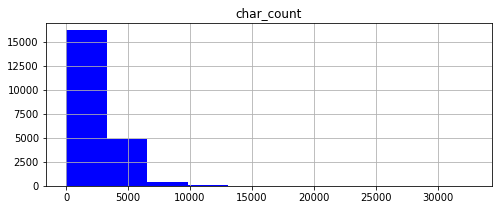

In [20]:
ColumnsToPlot=['char_count']
real[ColumnsToPlot].hist(figsize=(8,3), color='blue')

In [21]:
fake['char_count'] = fake['News_text'].str.len() ## this also includes spaces
fake[['News_text','char_count']].head()

,News_text,char_count
0,senate minority leader harry reid has it out f...,2246
1,in their desire to push hillary clinton across...,4846
2,there are people currently being turned down f...,2880
3,gay pride? tolerance is a one-way street for t...,2055
4,"congressman hakeem jeffries says that, while h...",1440


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7656b7e90>]],
      dtype=object)

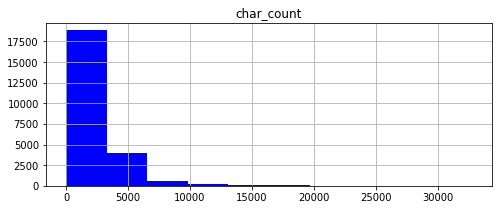

In [22]:
ColumnsToPlot=['char_count']
fake[ColumnsToPlot].hist(figsize=(8,3), color='blue')

In [ ]:
# no of words 


In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

real['stopwords'] = real['News_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
real[['News_text','stopwords']].head()

,News_text,stopwords
0,washington (reuters) - a lawyer nominated by p...,146
1,"(reuters) - u.s. senator dick durbin, the no. ...",25
2,geneva (reuters) - the head of the world trade...,165
3,budapest (reuters) - hungary is facing a front...,29
4,washington (reuters) - u.s. senate republicans...,298


In [27]:
fake['stopwords'] = fake['News_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
fake[['News_text','stopwords']].head()

,News_text,stopwords
0,senate minority leader harry reid has it out f...,165
1,in their desire to push hillary clinton across...,322
2,there are people currently being turned down f...,209
3,gay pride? tolerance is a one-way street for t...,132
4,"congressman hakeem jeffries says that, while h...",122


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa765acf1d0>]],
      dtype=object)

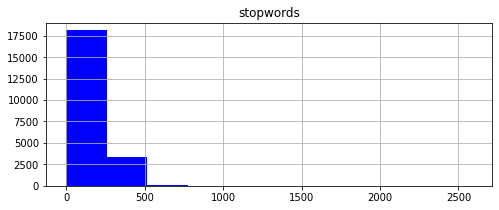

In [26]:
ColumnsToPlot2=['stopwords']
real[ColumnsToPlot2].hist(figsize=(8,3), color='blue')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7662b5190>]],
      dtype=object)

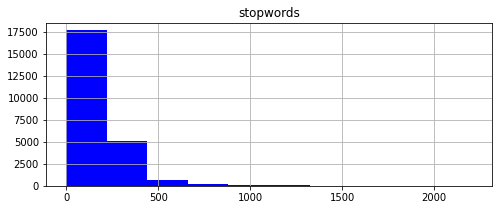

In [28]:
ColumnsToPlot2=['stopwords']
fake[ColumnsToPlot2].hist(figsize=(8,3), color='blue')

In [29]:
real['numerics'] = real['News_text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
real[['News_text','numerics']].head()

,News_text,numerics
0,washington (reuters) - a lawyer nominated by p...,4
1,"(reuters) - u.s. senator dick durbin, the no. ...",1
2,geneva (reuters) - the head of the world trade...,2
3,budapest (reuters) - hungary is facing a front...,0
4,washington (reuters) - u.s. senate republicans...,8


In [30]:
fake['numerics'] = fake['News_text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
fake[['News_text','numerics']].head()

,News_text,numerics
0,senate minority leader harry reid has it out f...,1
1,in their desire to push hillary clinton across...,22
2,there are people currently being turned down f...,0
3,gay pride? tolerance is a one-way street for t...,0
4,"congressman hakeem jeffries says that, while h...",0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7661d9dd0>]],
      dtype=object)

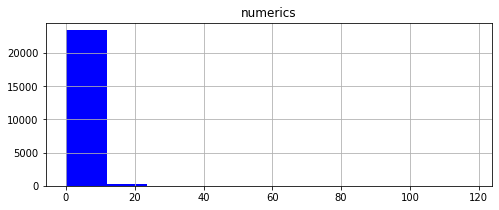

In [32]:
ColumnsToPlot3=['numerics']
fake[ColumnsToPlot3].hist(figsize=(8,3), color='blue')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa765b5d750>]],
      dtype=object)

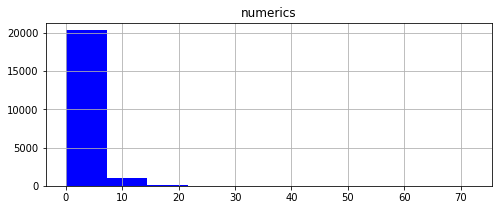

In [31]:
ColumnsToPlot3=['numerics']
real[ColumnsToPlot3].hist(figsize=(8,3), color='blue')

In [33]:
# Removing punctuations

fake['News_text'] = fake['News_text'].str.replace('[^\w\s]','')

In [34]:
real['News_text'] = real['News_text'].str.replace('[^\w\s]','')

In [35]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
# Removing all the stopwords

stop = stopwords.words('english')
fake.News_text = fake.News_text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
fake['News_text'].head()

0    senate minority leader harry reid republican n...
1    desire push hillary clinton across finish line...
2    people currently turned jobs applebee better r...
3    gay pride tolerance oneway street left two str...
4    congressman hakeem jeffries says would welcome...
Name: News_text, dtype: object

In [ ]:
stop = stopwords.words('english')
real.News_text = real.News_text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
real['News_text'].head()

0    washington reuters lawyer nominated president ...
1    reuters us senator dick durbin 2 democrat sena...
2    geneva reuters head world trade organization s...
3    budapest reuters hungary facing frontal assaul...
4    washington reuters us senate republicans ramme...
Name: News_text, dtype: object

In [37]:
# Removing all special characters 
fake.News_text = fake.News_text.str.replace('[#,@,?,",;,:,[,],{,},.,/,\,%,$,™,€,=,_,-,&]','')

In [38]:
real.News_text = real.News_text.str.replace('[#,@,?,",;,:,[,],{,},.,/,\,%,$,™,€,=,_,-,&]','')

In [39]:
# Removing all the numeric values in data
fake.News_text = fake.News_text.str.replace('\d+', '')


In [40]:
real.News_text = real.News_text.str.replace('\d+', '')


In [42]:
# removing all white spaces
fake['News_text']=fake['News_text'].str.strip()

In [43]:
real['News_text']=real['News_text'].str.strip()

In [ ]:
real['News_text'].iloc[0:1].values

array(['washington reuters lawyer nominated president donald trump serve federal judge withdrew consideration monday video senate confirmation hearing showing unable provide answers rudimentary legal questions went viral last week trump accepted matthew petersenâs offer withdraw nomination district court judge washington white house official said petersen republican member federal election commission became latest trumpâs judicial nominations fail president seeks win confirmation judges make federal judiciary conservative âœjust youâve seen âmy cousin vinnyâ doesnât qualify federal judgeâ republican senator john kennedy grilled petersen dec  confirmation hearing told wwltv referring  comedy film novice lawyer kennedy critical trumpâs judicial nominees asked several basic legal questions petersen could answer video shown cable news shows widely viewed internet âœwhile honored nominated position become clear past days nomination become distraction fair administrationâ petersen wrote with

In [44]:
# Add number to track fake and real
fake['target'] = '0'
real['target'] = '1'

In [45]:
# Concatenate dataframes
data = pd.concat([fake, real]).reset_index(drop = True)
data.shape

(45231, 7)

In [46]:
#Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [ ]:
# Check the data
data.head()

,Title,News_text,Subject,target
0,Trump thanks Putin for slashing U.S. diplomati...,washington reuters us president donald trump t...,politicsNews,1
1,Trump seeks to bar personal conduct claims fro...,san francisco reuters donald trumpâs attorneys...,politicsNews,1
2,Ohio congressman Ryan challenges Pelosi for Ho...,washington reuters us representative tim ryan ...,politicsNews,1
3,Kenya president's election campaign used firm ...,nairobi reuters runup kenya august presidentia...,worldnews,1
4,North Korea missile crisis seen pushing South ...,seoul reuters escalating threat arising nuclea...,politicsNews,1


In [47]:
# removing all white spaces
data['News_text']=data['News_text'].str.strip()

In [48]:
# Removing rare words 
freq = pd.Series(' '.join(data['News_text']).split()).value_counts()[-100:]
freq

profitsjb           1
whitehorse          1
oceanrodgers        1
carterlike          1
yankeesbullpen      1
                   ..
overprivileged      1
sheetsremarkably    1
gillis              1
tanfthe             1
womenworse          1
Length: 100, dtype: int64

In [ ]:
print(freq)

['addedhayes', 'httpstcojshlcjlbi', 'bostonarea', 'altwords', 'httpstcoocttspheg', 'affirmativeaction', 'dallaspastor', 'metthere', 'standstillâ', 'testifyspeaking', 'thursdayour', 'nasajplcaltechspace', 'questionerdean', 'dareen', 'tmsnrtrssiaby', 'anothernow', 'hamdam', 'predatorsthe', 'flightmuhammad', 'saltshakerlike', 'siamakâs', 'slaveryanthony', 'gabanna', 'jobswhite', 'bankster', 'bonamicirobert', 'percentjindal', 'nearlyreligious', 'âœignite', 'exchangesso', 'skelly', 'eclectica', 'baiterek', 'âœdiffering', 'assaultweapons', 'cheapwhile', 'ropesobama', 'yardsif', 'oligarchsobviously', 'childrenrepublican', 'orlandowith', 'impudencefor', 'rwashreichert', 'pulat', 'âœbullet', 'juddapatow', 'ivarsflaten', 'tht', 'dinosaurâ', 'votefraudorg', 'prosecutionmr', 'trumpcareryan', 'mrfrankbaraan', 'petukhov', 'immigrantsif', 'continuesschwarzenegger', 'rudiak', 'amalfi', 'controlread', 'landwatch', 'shoulderssource', 'dieas', 'billstrump', 'quests', 'davonte', 'âœforcefulâ', 'healthcare

In [49]:
freq = list(freq.index)
data['News_text'] = data['News_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [50]:
data.head()

,Title,News_text,Subject,char_count,stopwords,numerics,target
0,Justice Department mulls changing corporate pr...,washington reuters the us justice department i...,politicsNews,2617,157,1,1
1,"On Trump's Jerusalem move, Merkel says Germany...",berlin reuters chancellor angela merkel said o...,worldnews,571,40,0,1
2,MAKE $250K A YEAR? You Could Qualify For Subsi...,craziest thing ever wonder california broke so...,Government News,2011,142,2,0
3,British spy boss says cyber security as import...,london reuters protecting britain from cyber c...,worldnews,1814,99,1,1
4,LIBERAL HEADS EXPLODE When PIERS MORGAN Points...,watch video judge piers morgan correct linepie...,politics,2035,113,2,0


In [51]:
!pip install textblob
from textblob import TextBlob
from textblob import Word


In [ ]:
data.head(10)

,Title,News_text,Subject,target
0,Trump thanks Putin for slashing U.S. diplomati...,washington reuters us president donald trump t...,politicsNews,1
1,Trump seeks to bar personal conduct claims fro...,san francisco reuters donald trumpâs attorneys...,politicsNews,1
2,Ohio congressman Ryan challenges Pelosi for Ho...,washington reuters us representative tim ryan ...,politicsNews,1
3,Kenya president's election campaign used firm ...,nairobi reuters runup kenya august presidentia...,worldnews,1
4,North Korea missile crisis seen pushing South ...,seoul reuters escalating threat arising nuclea...,politicsNews,1
5,London's East Croydon station to reopen after ...,london reuters london east croydon station due...,worldnews,1
6,"Trump's defense chief heads to Asia, eying Chi...",washingtontokyo reuters president donald trump...,politicsNews,1
7,BERNIE SANDERS THANKS OBAMA For Not Endorsing ...,sorry bernie obama third term let geriatric so...,politics,0
8,Venezuela opposition says talks with governmen...,caracas reuters venezuela opposition said tues...,worldnews,1
9,Commentary: Party leaders often disliked their...,gop leaders unleashed stunning level vitriol p...,politicsNews,1


In [52]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
data['News_text'].head()

0    washington reuters us president donald trump t...
1    san francisco reuters donald trumpâs attorneys...
2    washington reuters us representative tim ryan ...
3    nairobi reuters runup kenya august presidentia...
4    seoul reuters escalating threat arising nuclea...
Name: News_text, dtype: object

In [53]:
# Lemmatization

from textblob import Word
data['News_text'] = data['News_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['News_text'].head()

0    washington reuters the u justice department is...
1    berlin reuters chancellor angela merkel said o...
2    craziest thing ever wonder california broke so...
3    london reuters protecting britain from cyber c...
4    watch video judge pier morgan correct linepier...
Name: News_text, dtype: object

In [ ]:
data['News_text'].iloc[0:1].values

array(['washington reuters u president donald trump thursday thanked russian president vladimir putin ordering united state slash diplomatic staff russia remark likely rekindle criticism trumpâs kidgloves handling putin breaking nearly two week silence putinâs july order cutting u embassy consulate staff nearly two third trump said âœiâm thankful let go large number people smaller payrollâ trump said âœthereâs real reason go backâ âœweâre going save lot moneyâ response putinâs cold warstyle move differing reaction president similar circumstance past also clash state department official called moscowâs order âœa regrettable uncalledfor actâ thursday state department immediate reaction comment trump made reporter vacation golf club bedminster new jersey congressional committee special counsel investigating conclusion u intelligence agency russia interfered election campaign hacking method help trump republican also looking possible collusion campaign russian official moscow repeatedly de

In [54]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords

from collections import Counter
from itertools import chain

In [55]:
# Creating unigrams , bigrams and trigrams for real and fake data

def find_ngrams(inplist, n):
    return list(zip(*[inplist[i:] for i in range(n)]))

real['unigrams'] = real['News_text'].map(lambda x: find_ngrams(x.split(" "), 1))
real['bigrams'] = real['News_text'].map(lambda x: find_ngrams(x.split(" "), 2))
real['trigrams'] = real['News_text'].map(lambda x: find_ngrams(x.split(" "), 3))

real.head()

,Title,News_text,Subject,char_count,stopwords,numerics,target,unigrams,bigrams,trigrams
0,Trump judicial nominee withdraws from consider...,washington reuters a lawyer nominated by pres...,politicsNews,2603,146,4,1,"[(washington,), (reuters,), (,), (a,), (lawyer...","[(washington, reuters), (reuters, ), (, a), (a...","[(washington, reuters, ), (reuters, , a), (, a..."
1,No. 2 Democrat in Senate calls on Franken to r...,reuters us senator dick durbin the no democr...,politicsNews,464,25,1,1,"[(reuters,), (,), (us,), (senator,), (dick,), ...","[(reuters, ), (, us), (us, senator), (senator,...","[(reuters, , us), (, us, senator), (us, senato..."
2,"WTO chief won't debate Trump, but rallies supp...",geneva reuters the head of the world trade or...,politicsNews,2368,165,2,1,"[(geneva,), (reuters,), (,), (the,), (head,), ...","[(geneva, reuters), (reuters, ), (, the), (the...","[(geneva, reuters, ), (reuters, , the), (, the..."
3,Hungary says it is facing 'frontal assault' fr...,budapest reuters hungary is facing a frontal ...,worldnews,581,29,0,1,"[(budapest,), (reuters,), (,), (hungary,), (is...","[(budapest, reuters), (reuters, ), (, hungary)...","[(budapest, reuters, ), (reuters, , hungary), ..."
4,Senate Republicans shove tax bill ahead as Dem...,washington reuters us senate republicans ramm...,politicsNews,5116,298,8,1,"[(washington,), (reuters,), (,), (us,), (senat...","[(washington, reuters), (reuters, ), (, us), (...","[(washington, reuters, ), (reuters, , us), (, ..."


In [56]:
def find_ngrams(inplist, n):
    return list(zip(*[inplist[i:] for i in range(n)]))

fake['unigrams'] = fake['News_text'].map(lambda x: find_ngrams(x.split(" "), 1))
fake['bigrams'] = fake['News_text'].map(lambda x: find_ngrams(x.split(" "), 2))
fake['trigrams'] = fake['News_text'].map(lambda x: find_ngrams(x.split(" "), 3))


fake.head()

,Title,News_text,Subject,char_count,stopwords,numerics,target,unigrams,bigrams,trigrams
0,Harry Reid UNLEASHES Anti-Trump Rant On Senat...,senate minority leader harry reid republican n...,News,2246,165,1,0,"[(senate,), (minority,), (leader,), (harry,), ...","[(senate, minority), (minority, leader), (lead...","[(senate, minority, leader), (minority, leader..."
1,BUSTED! MEDIA Caught Red-Handed Trying To Demo...,desire push hillary clinton across finish line...,left-news,4846,322,22,0,"[(desire,), (push,), (hillary,), (clinton,), (...","[(desire, push), (push, hillary), (hillary, cl...","[(desire, push, hillary), (push, hillary, clin..."
2,Trumpâ€™s Latest Appointee Is A Climate Denie...,people currently turned jobs applebee better r...,News,2880,209,0,0,"[(people,), (currently,), (turned,), (jobs,), ...","[(people, currently), (currently, turned), (tu...","[(people, currently, turned), (currently, turn..."
3,[VIDEO] TWO STREET PREACHERS SEVERELY BEATEN B...,gay pride tolerance oneway street left two str...,politics,2055,132,0,0,"[(gay,), (pride,), (tolerance,), (oneway,), (s...","[(gay, pride), (pride, tolerance), (tolerance,...","[(gay, pride, tolerance), (pride, tolerance, o..."
4,Dem. Rep. Says Steve Bannon Is A â€˜Stone Col...,congressman hakeem jeffries says would welcome...,News,1440,122,0,0,"[(congressman,), (hakeem,), (jeffries,), (says...","[(congressman, hakeem), (hakeem, jeffries), (j...","[(congressman, hakeem, jeffries), (hakeem, jef..."


Subject
Government News     1570
Middle-east          770
News                9306
PoliticalFact        220
US_News              775
left-news           4456
politics            6835
politicsNews       11308
worldnews           9991
Name: News_text, dtype: int64


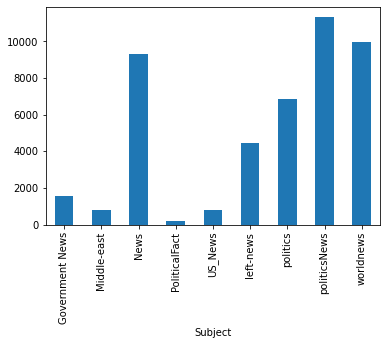

In [57]:
#Basic data exploration

print(data.groupby(['Subject'])['News_text'].count())
data.groupby(['Subject'])['News_text'].count().plot(kind="bar")
plt.show()

target
0    23689
1    21542
Name: News_text, dtype: int64


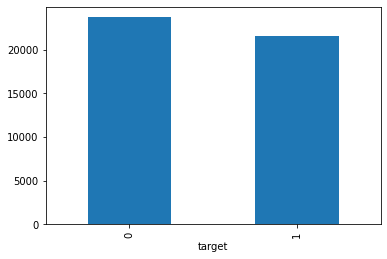

In [ ]:
# How many fake and real articles?
print(data.groupby(['target'])['News_text'].count())
data.groupby(['target'])['News_text'].count().plot(kind="bar")
plt.show()

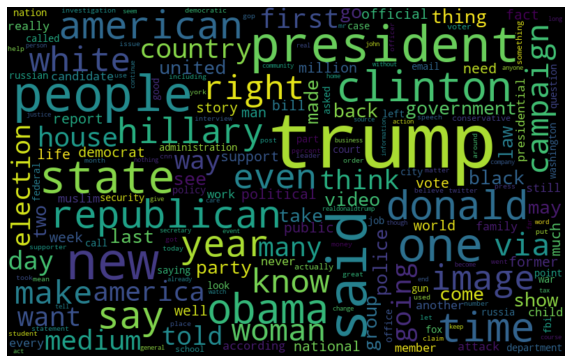

In [ ]:
# Word cloud for fake news
from wordcloud import WordCloud

fake = data[data["target"] == "0"]
all_words = ' '.join([News_text for News_text in fake.News_text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


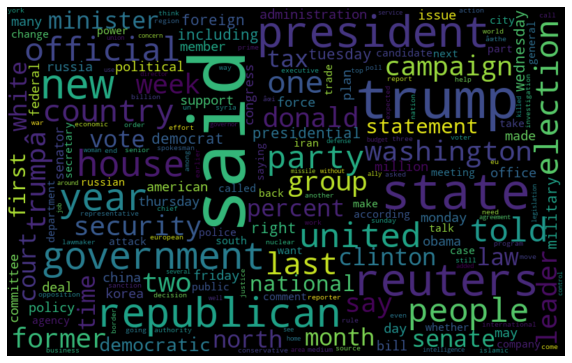

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

real = data[data["target"] == "1"]
all_words = ' '.join([News_text for News_text in real.News_text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Most frequent words counter 
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(News_text, column_text, quantity):
    all_words = ' '.join([text for text in News_text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

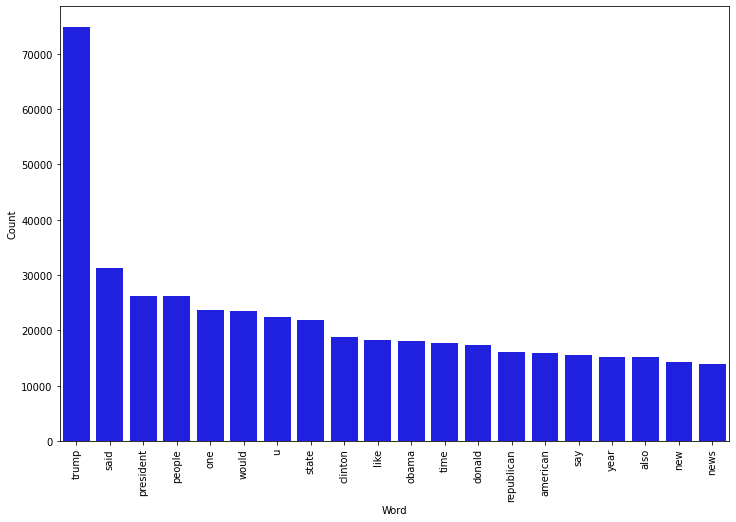

In [ ]:
counter(fake, "News_text", 20)

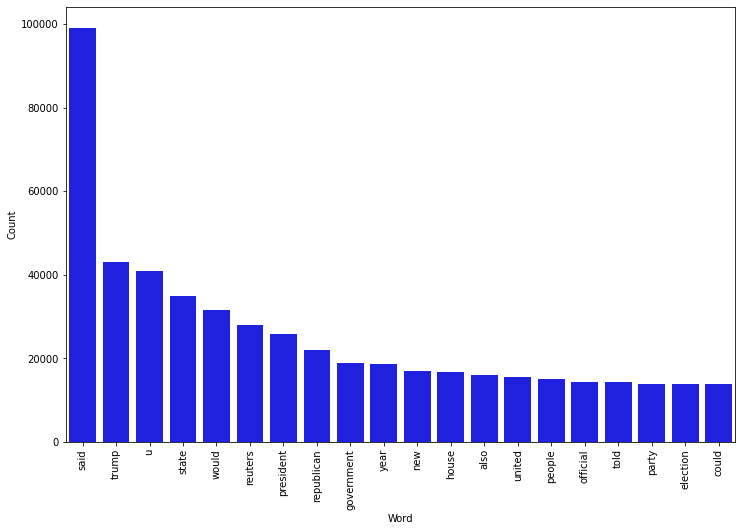

In [ ]:
counter(real, "News_text",20)

In [ ]:
data['News_text'].iloc[0:1].values

array(['washington reuters u president donald trump thursday thanked russian president vladimir putin ordering united state slash diplomatic staff russia remark likely rekindle criticism trumpâs kidgloves handling putin breaking nearly two week silence putinâs july order cutting u embassy consulate staff nearly two third trump said âœiâm thankful let go large number people smaller payrollâ trump said âœthereâs real reason go backâ âœweâre going save lot moneyâ response putinâs cold warstyle move differing reaction president similar circumstance past also clash state department official called moscowâs order âœa regrettable uncalledfor actâ thursday state department immediate reaction comment trump made reporter vacation golf club bedminster new jersey congressional committee special counsel investigating conclusion u intelligence agency russia interfered election campaign hacking method help trump republican also looking possible collusion campaign russian official moscow repeatedly de

In [58]:
#create bow and tf-idf
from sklearn.feature_extraction.text import CountVectorizer

#Creating the bag of words
bow_news = CountVectorizer().fit(data['News_text'])

news_vect = bow_news.transform(data['News_text'])

In [59]:
print(news_vect)

  (0, 629)	3
  (0, 1241)	3
  (0, 1251)	1
  (0, 2972)	1
  (0, 3643)	1
  (0, 5708)	1
  (0, 7794)	1
  (0, 7946)	3
  (0, 8108)	7
  (0, 9065)	1
  (0, 10398)	1
  (0, 10566)	1
  (0, 10914)	1
  (0, 12045)	1
  (0, 12729)	1
  (0, 13273)	2
  (0, 13276)	1
  (0, 14862)	1
  (0, 15497)	1
  (0, 15663)	1
  (0, 15863)	1
  (0, 16887)	4
  (0, 17264)	1
  (0, 17528)	1
  (0, 22534)	1
  :	:
  (45230, 192612)	1
  (45230, 193537)	3
  (45230, 193774)	1
  (45230, 193878)	1
  (45230, 195306)	14
  (45230, 196895)	1
  (45230, 197249)	2
  (45230, 199342)	1
  (45230, 199672)	1
  (45230, 201172)	1
  (45230, 201180)	1
  (45230, 202925)	1
  (45230, 203988)	1
  (45230, 206081)	1
  (45230, 207171)	1
  (45230, 208332)	1
  (45230, 208648)	1
  (45230, 209084)	1
  (45230, 209208)	1
  (45230, 210128)	1
  (45230, 211046)	1
  (45230, 211418)	1
  (45230, 212727)	2
  (45230, 213556)	1
  (45230, 214591)	1


In [60]:
#TF-IDF

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(news_vect)
news_tfidf = tfidf_transformer.transform(news_vect)
print(news_tfidf.shape)

(45231, 223425)


In [61]:
print(news_tfidf)

  (0, 220863)	0.0711679469278498
  (0, 219314)	0.07871017408885961
  (0, 219047)	0.04614487740493822
  (0, 212673)	0.23342825327566036
  (0, 211769)	0.0453425911983073
  (0, 209031)	0.04035380235708345
  (0, 208822)	0.03967628150098188
  (0, 208648)	0.06185901499339698
  (0, 208519)	0.020127832481755006
  (0, 208494)	0.024982852994894094
  (0, 208461)	0.0482092417284843
  (0, 208323)	0.026064658194783274
  (0, 208015)	0.08627849696022999
  (0, 205892)	0.01973024181909743
  (0, 204852)	0.03499315150742952
  (0, 200958)	0.035455197446880055
  (0, 199856)	0.03970268983682863
  (0, 199181)	0.06897546285418911
  (0, 198839)	0.0522772323697582
  (0, 196060)	0.027270873863863124
  (0, 194331)	0.03636057356025708
  (0, 193082)	0.02617660075748005
  (0, 192251)	0.14961541542820894
  (0, 190892)	0.04854379962814439
  (0, 189621)	0.02142348129253267
  :	:
  (45230, 19577)	0.11207311558913345
  (45230, 19532)	0.039916040035711524
  (45230, 19415)	0.04616887556134795
  (45230, 17860)	0.032769187318

In [62]:
print(bow_news)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [63]:
data['News_text'].iloc[0:1].values

array(['washington reuters the u justice department is reviewing it policy over how it prosecutes corporate white collar crime and may be making some change âœin the near futureâ deputy attorney general rod rosenstein said on thursday speaking at the heritage foundation rosenstein said that the department is reviewing the socalled yates memo a document released in by his predecessor sally yates which urged prosecutor to focus on holding individual accountable in corporate crime case âœit is under review and i anticipate that there may be some change to the policy on corporate prosecutionsâ rosenstein said he did not elaborate on what kind of change could be in store the memoâs emphasis on individual accountability is likely to be preserved given prior comment from attorney general jeff session about the importance of punishing individual for corporate crime the yates memo is widely seen a a response to criticism of the justice department following the financial crisis when few of the t

In [64]:
data['sentiment'] = data['News_text'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['News_text','sentiment']].head()

,News_text,sentiment
0,washington reuters the u justice department is...,0.024695
1,berlin reuters chancellor angela merkel said o...,0.250000
2,craziest thing ever wonder california broke so...,0.056503
3,london reuters protecting britain from cyber c...,0.199951
4,watch video judge pier morgan correct linepier...,0.102644


In [65]:
tf1 = (data['News_text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,the,5
1,to,4
2,on,4
3,of,3
4,that,3
...,...,...
58,need,1
59,and,1
60,president,1
61,twostate,1


In [66]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['News_text'].str.contains(word)])))

tf1

,words,tf,idf
0,the,5,0.135685
1,to,4,0.061596
2,on,4,0.026140
3,of,3,0.289489
4,that,3,0.811959
...,...,...,...
58,need,1,1.445284
59,and,1,0.184061
60,president,1,0.522262
61,twostate,1,6.155190


In [67]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,the,5,0.135685,0.678423
1,to,4,0.061596,0.246386
2,on,4,0.026140,0.104558
3,of,3,0.289489,0.868468
4,that,3,0.811959,2.435876
...,...,...,...,...
58,need,1,1.445284,1.445284
59,and,1,0.184061,0.184061
60,president,1,0.522262,0.522262
61,twostate,1,6.155190,6.155190


In [69]:
print(bow_news)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [ ]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
#preparing the data
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['News_text'], data.target, test_size=0.2, random_state=42)

In [ ]:
# logistic regression
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.41%


Confusion matrix, without normalization


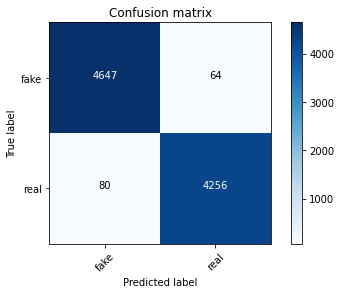

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['fake', 'real'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.66%


Confusion matrix, without normalization


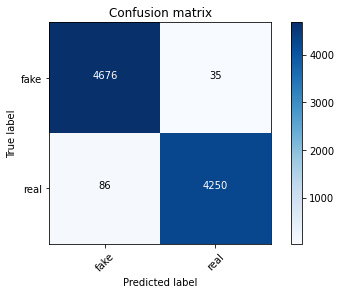

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['fake', 'real'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.25%


Confusion matrix, without normalization


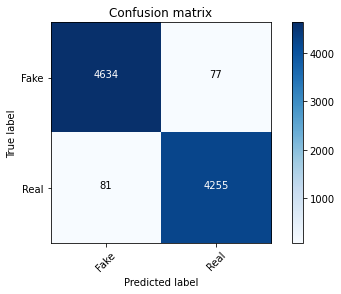

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])